# Продвинутое машинное обучение: ДЗ 1

## Часть I: О теореме Байеса

1. Пусть ${Y}$ - событие, что подсудимый имеет ту же группу крови, что и убица. Тогда $\overline{Y}$ - обратное событие, то есть подсудимый имеет группу крови, отличную от убийцы. Также пусть $X$ - событие, что подсудимый виновен, и $\overline{X}$ - невиновен. 

Прокурор оценил $Р(Y \mid \overline{X})$, хотя она будет действительно почти $1\%$. 
На самом деле немного меньше: $\frac{0.01 P(X)}{P(\overline{X})}, где P(X) \to 0$ и $P(\overline{X}) \to 1$. Он также решил, что $Р(Y \mid \overline{X}) + P(X \mid Y) = 1$, и поэтому сказал, что $P(X \mid Y) = 99\%$. Докажем, что это неверно: допустим
$$ Р(Y \mid \overline{X}) + P(X \mid Y) = 1 \iff$$ 
$$ \frac{P(\overline{X} \mid Y) P(Y)}{P(\overline{X})} + 1 - P(\overline{X} \mid Y) = 1 \iff$$
$$ P(\overline{X} | Y) P(Y) = P(\overline{X} \mid Y) P(\overline{X}) \implies P(Y) = P(\overline{X})$$
Но мы знаем, что они явно не равны, так как $P(\overline{X}) \to 1$, а $P(Y) = 0.01$. Следовательно, наше предположение неверно.

Прокурор должен был оценить $P(X \mid Y) = \frac{P(Y \mid X) P(X)}{P(Y)} = \frac{1 P(X)}{0.01} = 100 P(X)$. То есть тот факт, что у подсудимого та же группа крови, что и у убийцы увеличивает вероятность его виновности в 100 раз.

2. Адвокат верно оценил вероятность $P(X | Y) = 0.01 \%$, но умолчал о том, что так как в городе живет 1 000 000 человек, информация о группе крове увеличила вероятность с $P(X) = 1e^{-6}$ до $P(X | Y) = 1e^{-4}$, то есть в 100 раз. Кроме того, эта вероятность рассчитана не учитывая никакие другие факты, кроме группы крови, и уже так сильно увеличила вероятность виновности, поэтому некорректно говорить, что группа крови дает ничтожно малую вероятность виновности.

3. Обозначим события болен / не болен как $+ / -$ соответственно, а события тест положительный / отрицательный как $T+ /$ $T-$. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

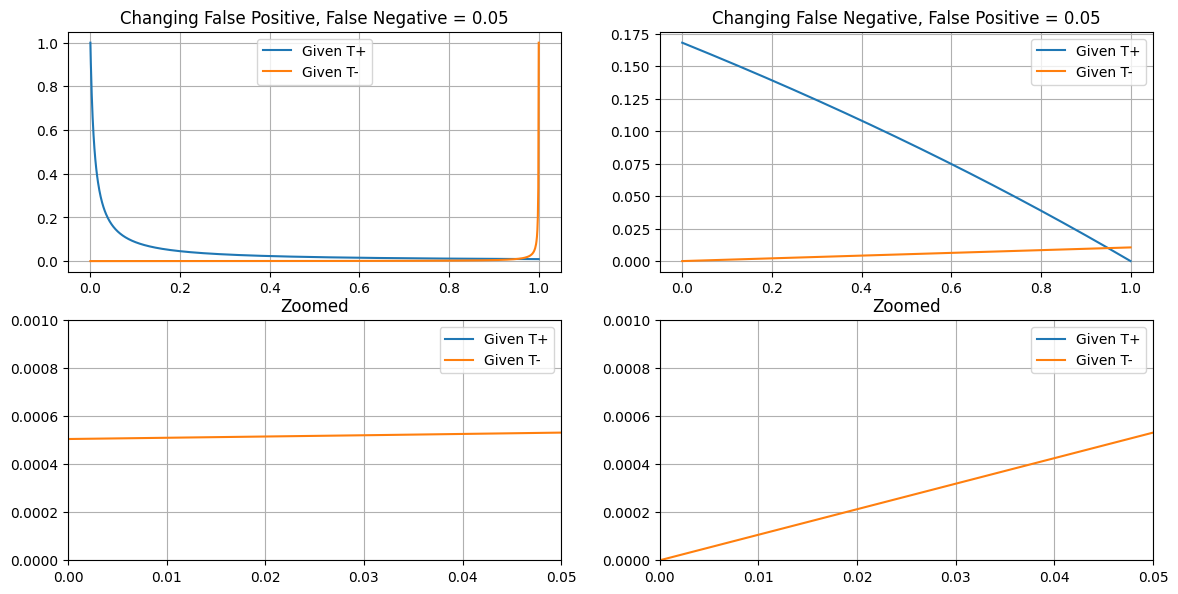

In [2]:
p_plus = 0.01
p_minus = 1 - p_plus
def posterior_given_t_plus(FP, FN):
    TP = 1 - FN
    # posterior P(+ | T+)
    return TP * p_plus / (TP * p_plus + FP * p_minus)
    
def posterior_given_t_minus(FP, FN):
    TN = 1 - FP
    # posterior P(+ | T-)
    return FN * p_plus / (FN * p_plus + TN * p_minus)

fig, axes = plt.subplots(2, 2, figsize=(14, 7), dpi=100)

fp = np.linspace(1, 0, 1000)
fn = np.linspace(1, 0, 1000)

axes[0, 0].set_title('Changing False Positive, False Negative = 0.05')
axes[0, 0].plot(fp, posterior_given_t_plus(FP=fp, FN=0.05), label='Given T+')
axes[0, 0].plot(fn, posterior_given_t_minus(FP=fp, FN=0.05), label='Given T-')
axes[0, 0].grid()
axes[0, 0].legend()

axes[0, 1].set_title('Changing False Negative, False Positive = 0.05')
axes[0, 1].plot(fp, posterior_given_t_plus(FP=0.05, FN=fn), label='Given T+')
axes[0, 1].plot(fn, posterior_given_t_minus(FP=0.05, FN=fn), label='Given T-')
axes[0, 1].grid()
axes[0, 1].legend()

axes[1, 0].set_title('Zoomed')
axes[1, 0].plot(fp, posterior_given_t_plus(FP=fp, FN=0.05), label='Given T+')
axes[1, 0].plot(fn, posterior_given_t_minus(FP=fp, FN=0.05), label='Given T-')
axes[1, 0].grid()
axes[1, 0].set_xlim([0, 0.05])
axes[1, 0].set_ylim([0, 0.001])
axes[1, 0].legend()

axes[1, 1].set_title('Zoomed')
axes[1, 1].plot(fp, posterior_given_t_plus(FP=0.05, FN=fn), label='Given T+')
axes[1, 1].plot(fn, posterior_given_t_minus(FP=0.05, FN=fn), label='Given T-')
axes[1, 1].grid()
axes[1, 1].set_xlim([0, 0.05])
axes[1, 1].set_ylim([0, 0.001])
axes[1, 1].legend()

Как мы видим, $P(+ \mid T+)$ более чувствителен к изменениям обеих ошибок, нежели $P(+ \mid T-)$. Также мы видим что уменьшение вероятности False Positive экспоненциально увеличивает апостериорную вероятгность $P(+ \mid T+)$, в то время как уменьшение вероятности False Negative увеличивается эту же вероятность всего лишь линейно. Теперь обратим внимание на нижние графики, которые увляются приближениями верхних. При уменьшении вероятности False Negative вероятгность $P(+ \mid T-)$ уменьшается быстрее, чем при уменьшении вероятности False Positive. Судя по условию задачи, врачей не устраивала именно маленькая вероятность $P(+ \mid T+)$. Тогда, если предположить, что $P(+ \mid T-) \approx 0.0005$ является приемлемой, следует уменьшать ошибку I рода - False Posivies.

## Часть II: О линейной регрессии

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

data = pd.read_csv('owid-covid-data.csv')

In [4]:
data_russia = data[(data['location'] == 'Russia') & (data['date'] >= '2020-03-03')].iloc[:50]
data_russia.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
49815,RUS,Europe,Russia,2020-03-03,3.0,0.0,0.143,NaN,NaN,0.0,0.021,0.000,0.001,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.816
49816,RUS,Europe,Russia,2020-03-04,3.0,0.0,0.143,NaN,NaN,0.0,0.021,0.000,0.001,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46414.0,0.318,NaN,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.816
49817,RUS,Europe,Russia,2020-03-05,4.0,1.0,0.286,NaN,NaN,0.0,0.027,0.007,0.002,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4952.0,51366.0,0.352,0.034,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.22,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.816
49818,RUS,Europe,Russia,2020-03-06,13.0,9.0,1.571,NaN,NaN,0.0,0.089,0.062,0.011,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4322.0,55688.0,0.382,0.030,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.22,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.816
49819,RUS,Europe,Russia,2020-03-07,13.0,0.0,1.571,NaN,NaN,0.0,0.089,0.000,0.011,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4272.0,59960.0,0.411,0.029,NaN,NaN,NaN,NaN,tests performed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.22,145934460.0,8.823,39.6,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.816


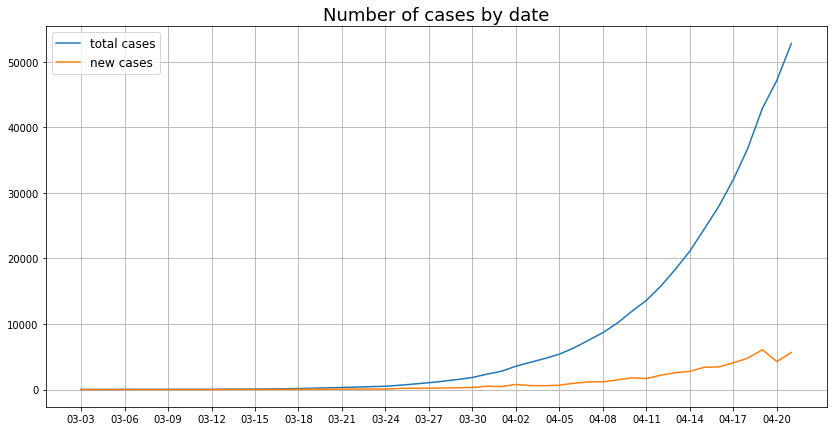

In [5]:
plt.figure(figsize=(14, 7))
date_formatted = data_russia['date'].map(lambda x: x[5:])
plt.title('Number of cases by date', fontsize=18)
plt.plot(date_formatted, data_russia['total_cases'], label='total cases')
plt.plot(date_formatted, data_russia['new_cases'], label='new cases')
plt.xticks(date_formatted.iloc[::3])
plt.grid()
plt.legend(fontsize=12)
plt.show()

In [6]:
from sklearn.linear_model import Ridge

X = data_russia.index - data_russia.index[0]
y = data_russia['total_cases']

X_train = X.to_numpy().reshape(-1, 1)
log_y = np.log(y)
# y = exp(w0 + w1*x) <=> ln(y) = w0 + w1*x
linreg = Ridge(alpha=0.005).fit(X_train, log_y)

In [7]:
linreg.coef_, linreg.intercept_

(array([0.19829082]), 1.8207394816178386)

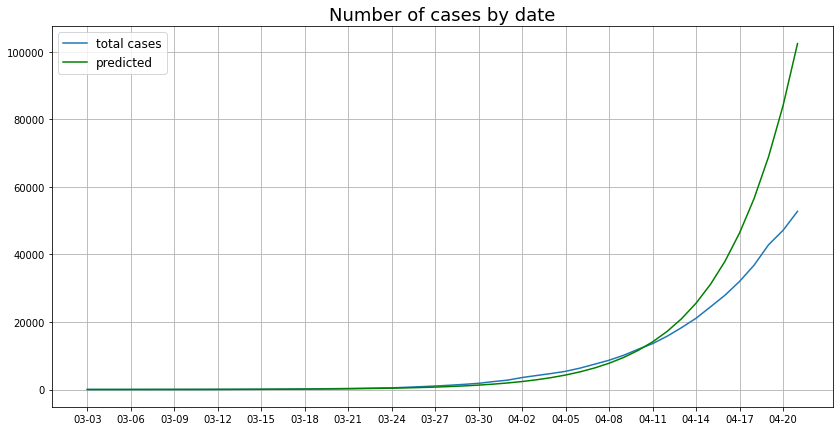

In [8]:
plt.figure(figsize=(14, 7))
date_formatted = data_russia['date'].map(lambda x: x[5:])
plt.title('Number of cases by date', fontsize=18)
plt.plot(date_formatted, data_russia['total_cases'], label='total cases')
plt.plot(date_formatted, np.exp(linreg.predict(X.to_numpy().reshape(-1, 1))), label='predicted', color='green')
plt.xticks(date_formatted.iloc[::3])
plt.grid()
plt.legend(fontsize=12)
plt.show()

Пусть априорное распределение параметров модели $p(w) = \mathcal{N}(0, \alpha I)$, а правдоподобность данных при условии параметров модели $p(D | w) = \prod_{i}\mathcal{N}(y_i | x_i^\top w, \sigma^2)$. Тогда апостериорное распределение $p(w | D) = \mathcal{N}(\mu, \Sigma)$, где 
$$\begin{cases}
\Sigma ^{-1} = \frac{1}{\alpha}I + \frac{1}{\sigma^2} X^\top X\\
\mu = \Sigma(\alpha^{-1} I \mu + \frac{1}{\sigma^2} X^\top y)
\end{cases}$$
Тогда $w_{MAP} = \mu$, так как нормальное распределение унимодально. Мы видим, что апостериорное распределение зависит от дисперсии шума данных $\sigma^2$. Попробуем оценить его, используя рассуждения из лекции:

$$p(\sigma^2 | D) \propto p(D | \sigma^2) p(\sigma^2)$$ где $p(\sigma^2)$ равномерное и будет равно нулю при оптимизации. Тогда
$$p(D |\sigma^2) = \int p(D | w, \sigma^2) p(w) dw$$
$$\ln p(D | \sigma^2) = const + \frac{1}{2} \ln\frac{1}{\sigma^2} - \frac{1}{2}\ln\det A - \frac{1}{2} \ln 2\pi - \frac{1}{2\sigma^2} \sum_i (y_i - \mu^\top x_i)^2 - \frac{1}{2\alpha}\mu^\top \mu$$ где $A = \frac{1}{\sigma^2}X^\top X + \frac{1}{\alpha}I$.

Теперь мы можем максимизоровать $\ln p(D | \sigma^2)$ по $\sigma^2$, или, что то же самое, минимизировать $-\ln p(D | \sigma^2)$. 


In [9]:
from scipy.optimize import minimize
def log_llh(sigma_sqrd, alpha, dim, X, y):
    mu_map = np.linalg.inv(1/alpha * np.eye(dim) + 1/sigma_sqrd * X.T @ X) @ (1/sigma_sqrd * X.T @ y)
    return -(y.shape[0]/2 * np.log(1/sigma_sqrd) - 1/2 * np.log(np.linalg.det(1/alpha * np.eye(dim) + 1/sigma_sqrd * X.T @ X))
              - 1/(sigma_sqrd*2) * np.sum((y -  X @ mu_map)**2) - 1/(alpha*2) * np.dot(mu_map, mu_map))

Проверим правильность рассуждений

In [10]:
def transform_X(X):
    return np.hstack((X, np.ones(X.shape[0], dtype=X.dtype)[:, None]))

In [11]:
np.random.seed(42)
func = lambda x : 2*x - 3
true_sigma_sqrd = 0.3
xd_large = np.linspace(-1, 5, 1000)
data_large = func(xd_large) + np.random.normal(0, np.sqrt(true_sigma_sqrd), len(xd_large))

alpha = 25
print(f'true \sigma^2: {true_sigma_sqrd}')
# bruteforce minimizing
sigmas_sqrd = np.linspace(0.00001, 5, 10000)
llhs = np.array([log_llh(sigma_sqrd, alpha, 2, transform_X(xd_large.reshape(-1, 1)), data_large) for sigma_sqrd in sigmas_sqrd])
print(f'sigma^2 bruteforce estimate: {sigmas_sqrd[np.argmin(llhs)]}')
result = minimize(log_llh, [0.5], (alpha, 2, transform_X(xd_large.reshape(-1, 1)), data_large), bounds=[(0.00001, 5)])
print(f'sigma^2 scipy estimate: {result.x[0]}')

true \sigma^2: 0.3
sigma^2 bruteforce estimate: 0.2875381778177818
sigma^2 scipy estimate: 0.28758483276210134


Как мы видим, оптимизация дает верный результат. Однако изначально оптимизация этой функции давала неверный результат из-за ошибки, допущенной мной в формуле. Я очень должно не мог найти эту ошибку и решил оценить шум по-другому. В итоге я все-таки нашел ошибку в формуле, но решил не удалять выкладки.

Давайте оценим $p(D |\sigma^2) = \int p(D | w, \sigma^2) p(w) dw$ в точке $w = w_{MAP} = \mu$ и максимизируем правдоподобие 
$$\large p(D | \mu, \sigma^2) = \prod_i^n \mathcal{N}\frac{1}{\sqrt{2 \pi \sigma^2}} e^{\frac{1}{-(2\sigma^2)}(y_i - \mu^\top x_i)^2} $$
Возьмем логарифм
$$\sum_i^n const - \ln \sigma - \frac{1}{2\sigma^2} (y_i - [(\frac{1}{\alpha} I + \frac{1}{\sigma^2} X^\top X)^{-1} (\frac{1}{\sigma^2} X^\top y_i)]^\top x_i)^2$$
$$-n * \ln\sigma - \frac{1}{2\sigma^2} \sum_i^n y_i - X[(\frac{1}{\alpha} I + \frac{1}{\sigma^2} X^\top X)^{-1} (\frac{1}{\sigma^2} X^\top y_i)]$$
где $X$ - это матрица $n \times d$ объектов-признаков. 
Проверим на искуственном примере

In [12]:
def log_llh_map(sigma_sqrd, alpha, dim, X, y):
    mu_map = np.linalg.inv(1/alpha * np.eye(dim) + 1 / sigma_sqrd * X.T @ X) @ (1 / sigma_sqrd * X.T @ y)
    return -(-y.shape[0]*np.log(np.sqrt(sigma_sqrd)) - 1 / (2 * sigma_sqrd) * np.sum((y -  X @ mu_map)**2))

In [13]:
np.random.seed(42)
func = lambda x : 2*x - 3
true_sigma_sqrd = 0.3
xd_large = np.linspace(-1, 5, 1000)
data_large = func(xd_large) + np.random.normal(0, np.sqrt(true_sigma_sqrd), len(xd_large))

print(f'true \sigma^2: {true_sigma_sqrd}')
# bruteforce minimizing
sigmas_sqrd = np.linspace(0.00001, 5, 10000)
llhs = np.array([log_llh_map(sigma_sqrd, 5**2, 2, transform_X(xd_large.reshape(-1, 1)), data_large) for sigma_sqrd in sigmas_sqrd])
print(f'sigma^2 bruteforce estimate: {sigmas_sqrd[np.argmin(llhs)]}')
result = minimize(log_llh_map, [0.5], (5**2, 2, transform_X(xd_large.reshape(-1, 1)), data_large), bounds=[(0.00001, 5)])
print(f'sigma^2 scipy estimate: {result.x[0]}')

true \sigma^2: 0.3
sigma^2 bruteforce estimate: 0.2870381288128813
sigma^2 scipy estimate: 0.28700965574551957


Как мы видим такая оценка дает результат отличающейся от оценки через расчет всего интеграла только в 4-м знаки после запятой.

Теперь оценим шум данных в нашей задаче. Априорное распределение возьмем равным $p(w) = \mathcal{N}(0, \alpha I)$, где $\alpha = 10$

In [14]:
alpha = 10
X_homo = transform_X(X.to_numpy().reshape(-1, 1))
result = minimize(log_llh, [0.5], (alpha, 2, X_homo, log_y.to_numpy()), bounds=[(0.00001, 5)])
print(f'Data noise variance estimate: {result.x[0]:.3f}')

Data noise variance estimate: 0.127


Теперь посчитаем параметры апостериорного распределения

In [15]:
def posterior_params(sigma_sqrd, mu0, alpha, dim, X, y):
    cov_matrix = np.linalg.inv(1/alpha * np.eye(dim) + 1 / sigma_sqrd * X.T @ X)
    mu_map = cov_matrix @ (1/alpha * np.eye(dim) @ mu0 + 1 / sigma_sqrd * X.T @ y)
    return cov_matrix, mu_map

In [16]:
cov_matrix, mu_map = posterior_params(result.x[0], [0, 0] , alpha, 2, X_homo, log_y.to_numpy())
print('Covariance matrix:\n', cov_matrix)
print('Mean of a posteriori distibution:\n', mu_map)

Covariance matrix:
 [[ 1.21788306e-05 -2.98305636e-04]
 [-2.98305636e-04  9.84408908e-03]]
Mean of a posteriori distibution:
 [0.19834498 1.81895071]


Теперь попробуем посэмплить веса линейной регрессии из апостериорного распределения. Также натренируем много гребневых регрессий на бутстраппированных выборках того же размера с коеффициентом регуляризации равным $\lambda = \frac{\sigma^2}{\alpha}$, где $\sigma^2$ это оцененная дисперсия шума в данных, а $\alpha$ дисперсия априорного распредления и сравним полученные распределения. 
На графике **светло-серые** линии соответствуют бутсраппированным регрессиям, **светло-голубые** соответствуют регрессиям, параметры которых засэмплены из апостериорного распределения. Соответствующие средние обозначены на графике **черным** и **красным**.

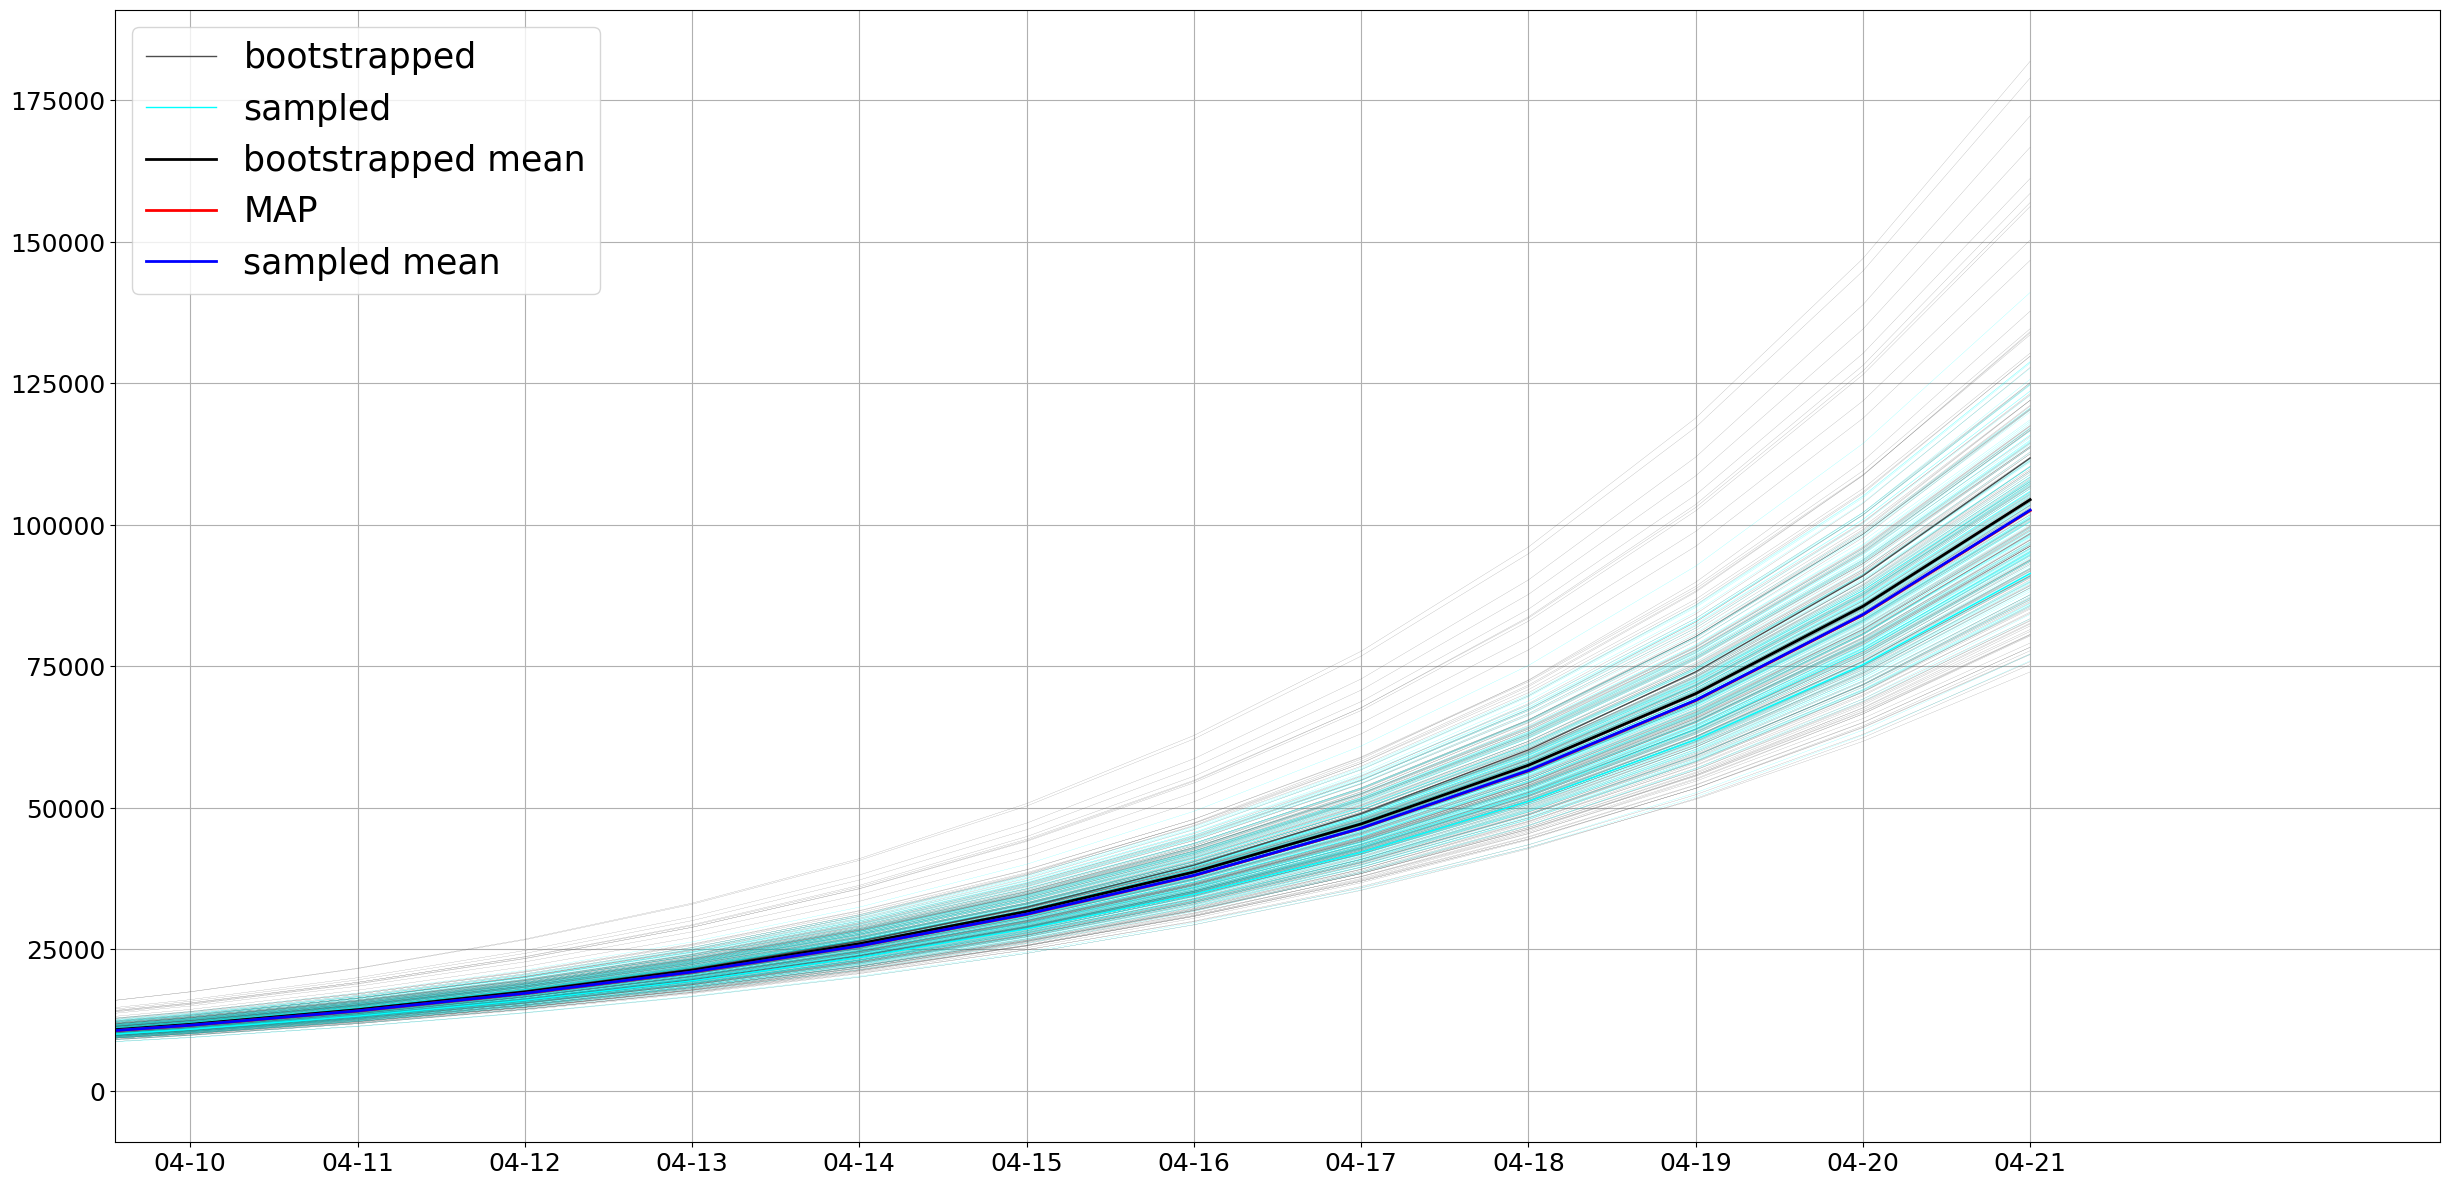

In [17]:
N = 200
sample_size = 30
plt.figure(figsize=(30, 15), dpi=100)

res = []
res2 = []
sampled_params = np.random.multivariate_normal(mu_map, cov_matrix, size=N)
linregs = []
for i in range(N):
    cur_data_idxs = np.random.choice(np.arange(50), sample_size, replace=True)
    linregs.append(Ridge(alpha=result.x[0]/alpha).fit(X_train[cur_data_idxs], log_y.iloc[cur_data_idxs]))
    res.append(np.exp(linregs[-1].predict(X_train)))
    
    w = sampled_params[i]
    res2.append(np.exp(X_homo @ w))

    if i == N-1:
        plt.plot(date_formatted, res[-1], linewidth=1, color='0.3', label='bootstrapped')
        plt.plot(X, res2[-1], linewidth=1, color='cyan', label='sampled')
    else:
        plt.plot(date_formatted, res[-1], linewidth=.1, color='0.3')
        plt.plot(X, res2[-1], linewidth=.1, color='cyan')

plt.plot(date_formatted, np.mean(np.array(res), axis=0), linewidth=2, color='black', label='bootstrapped mean')
plt.plot(date_formatted, np.exp(X_homo @ mu_map), linewidth=2, color='red', label='MAP')
plt.plot(date_formatted, np.mean(np.array(res2), axis=0), linewidth=2, color='blue', label='sampled mean')



left, right = plt.xlim()
plt.xlim(left+40, right)

# plt.xticks(date_formatted.iloc[::3])
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.legend(fontsize=25)
plt.grid()
plt.show()

Как мы видим распределение бутстраппированных регрессий имеет б**о**льшую дисперию. Средние могут отличаться, а могут почти совпадать, однако стоит заметить, что среднее предсказание бутстрапированной выборки всегда больше или равно среднему апостериорного распределения, что в нашем случае совпадает с MAP, однако никогда не получается меньше. Также заметим что предсказания с весами $w_{MAP}$ практически совпадают со средним предсказанием линейный регрессий, параметры которых засэмплены из апостериорного распределения

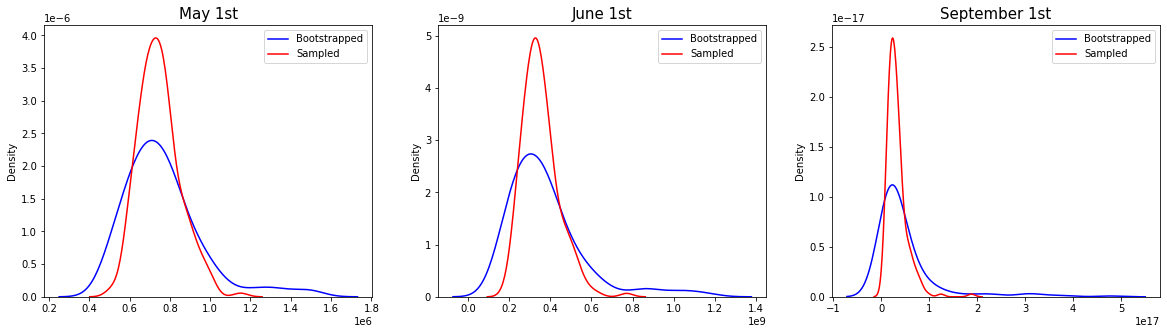

In [18]:
from datetime import datetime

start_day = datetime(2020, 3, 3).timetuple().tm_yday

# day number from the March, 3rd
may_1st_day = datetime(2020, 5, 1).timetuple().tm_yday - start_day
june_1st_day = datetime(2020, 6, 1).timetuple().tm_yday - start_day
september_1st_day = datetime(2020, 9, 1).timetuple().tm_yday - start_day

may_predictions = [np.exp(model.predict([[may_1st_day]])[0]) for model in linregs]
june_predictions = [np.exp(model.predict([[june_1st_day]])[0]) for model in linregs]
september_predictions = [np.exp(model.predict([[september_1st_day]])[0]) for model in linregs]


may_predictions_sampled = [np.exp(transform_X(np.array([may_1st_day])[:, None]) @ w)[0] for w in sampled_params]
june_predictions_sampled = [np.exp(transform_X(np.array([june_1st_day])[:, None]) @ w)[0] for w in sampled_params]
september_predictions_sampled = [np.exp(transform_X(np.array([september_1st_day])[:, None]) @ w)[0] for w in sampled_params]

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for (preds_bootstrapped, preds_sampled), title, ax in zip(list(zip([may_predictions, june_predictions, september_predictions],
                        [may_predictions_sampled, june_predictions_sampled, september_predictions_sampled])),
                            ['May 1st', 'June 1st', 'September 1st'],
                            axes):
    ax.set_title(title, fontsize=15)
    sns.kdeplot(preds_bootstrapped, color='blue', label='Bootstrapped', ax=ax)
    sns.kdeplot(preds_sampled, color='red', label='Sampled', ax=ax)


    ax.legend()
    
    
plt.show()

3. Мы хотим обучить $y = \frac{1}{\sqrt{2\pi}}\int_{-\inf}^x exp(\frac{(t - \mu)^2}{2\sigma^2})dt$. Возьмем производную и логарифм от обеих частей. Получим
$$\ln(\frac{dy}{dx}) = \ln(\frac{c}{\sqrt{2\pi}}) -\frac{1}{2\sigma^2} (x - \mu)^2$$
Параметры $\mu$ и $\sigma$ не имеют особого смысла, так как полученная правая часть это просто квадратичная функция от $x$, а все коэффициенты мы будем учить линейной регрессией. $\frac{dy}{dx}$ есть ничто иное как колонка *new_cases* в нашем датасете, которая по сути дискретно аппроксимируем скорость роста заболеваемости.

In [19]:
from sklearn.linear_model import Ridge

y2 = data_russia['new_cases']
y2 = y2.replace(0, 1)

X_train2 = np.vstack((X.to_numpy()**2, X.to_numpy())).T
log_y2 = np.log(y2)

linreg2 = Ridge(alpha=1).fit(X_train2, log_y2)

In [20]:
linreg2.coef_, linreg2.intercept_

(array([-0.00182201,  0.27521497]), -0.39289140028936576)

In [21]:
X_homo2 = transform_X(X_train2)
alpha2 = 10
result2 = minimize(log_llh, [0.5], (alpha2, 3, X_homo2, log_y2.to_numpy()), bounds=[(0.00001, 5)])
print(f'Data noise variance estimate: {result2.x[0]:.3f}')

Data noise variance estimate: 0.255


In [22]:
cov_matrix2, mu_map2 = posterior_params(result2.x[0], [0, 0, 0] , alpha2, 3, X_homo2, log_y2.to_numpy())
print('Covariance matrix:\n', cov_matrix2)
print('Mean of a posteriori distibution:\n', mu_map2)

Covariance matrix:
 [[ 1.46572126e-07 -7.17858230e-06  5.73425110e-05]
 [-7.17858230e-06  3.75991025e-04 -3.40616234e-03]
 [ 5.73425110e-05 -3.40616234e-03  4.21588519e-02]]
Mean of a posteriori distibution:
 [-0.00182732  0.27547738 -0.39482453]


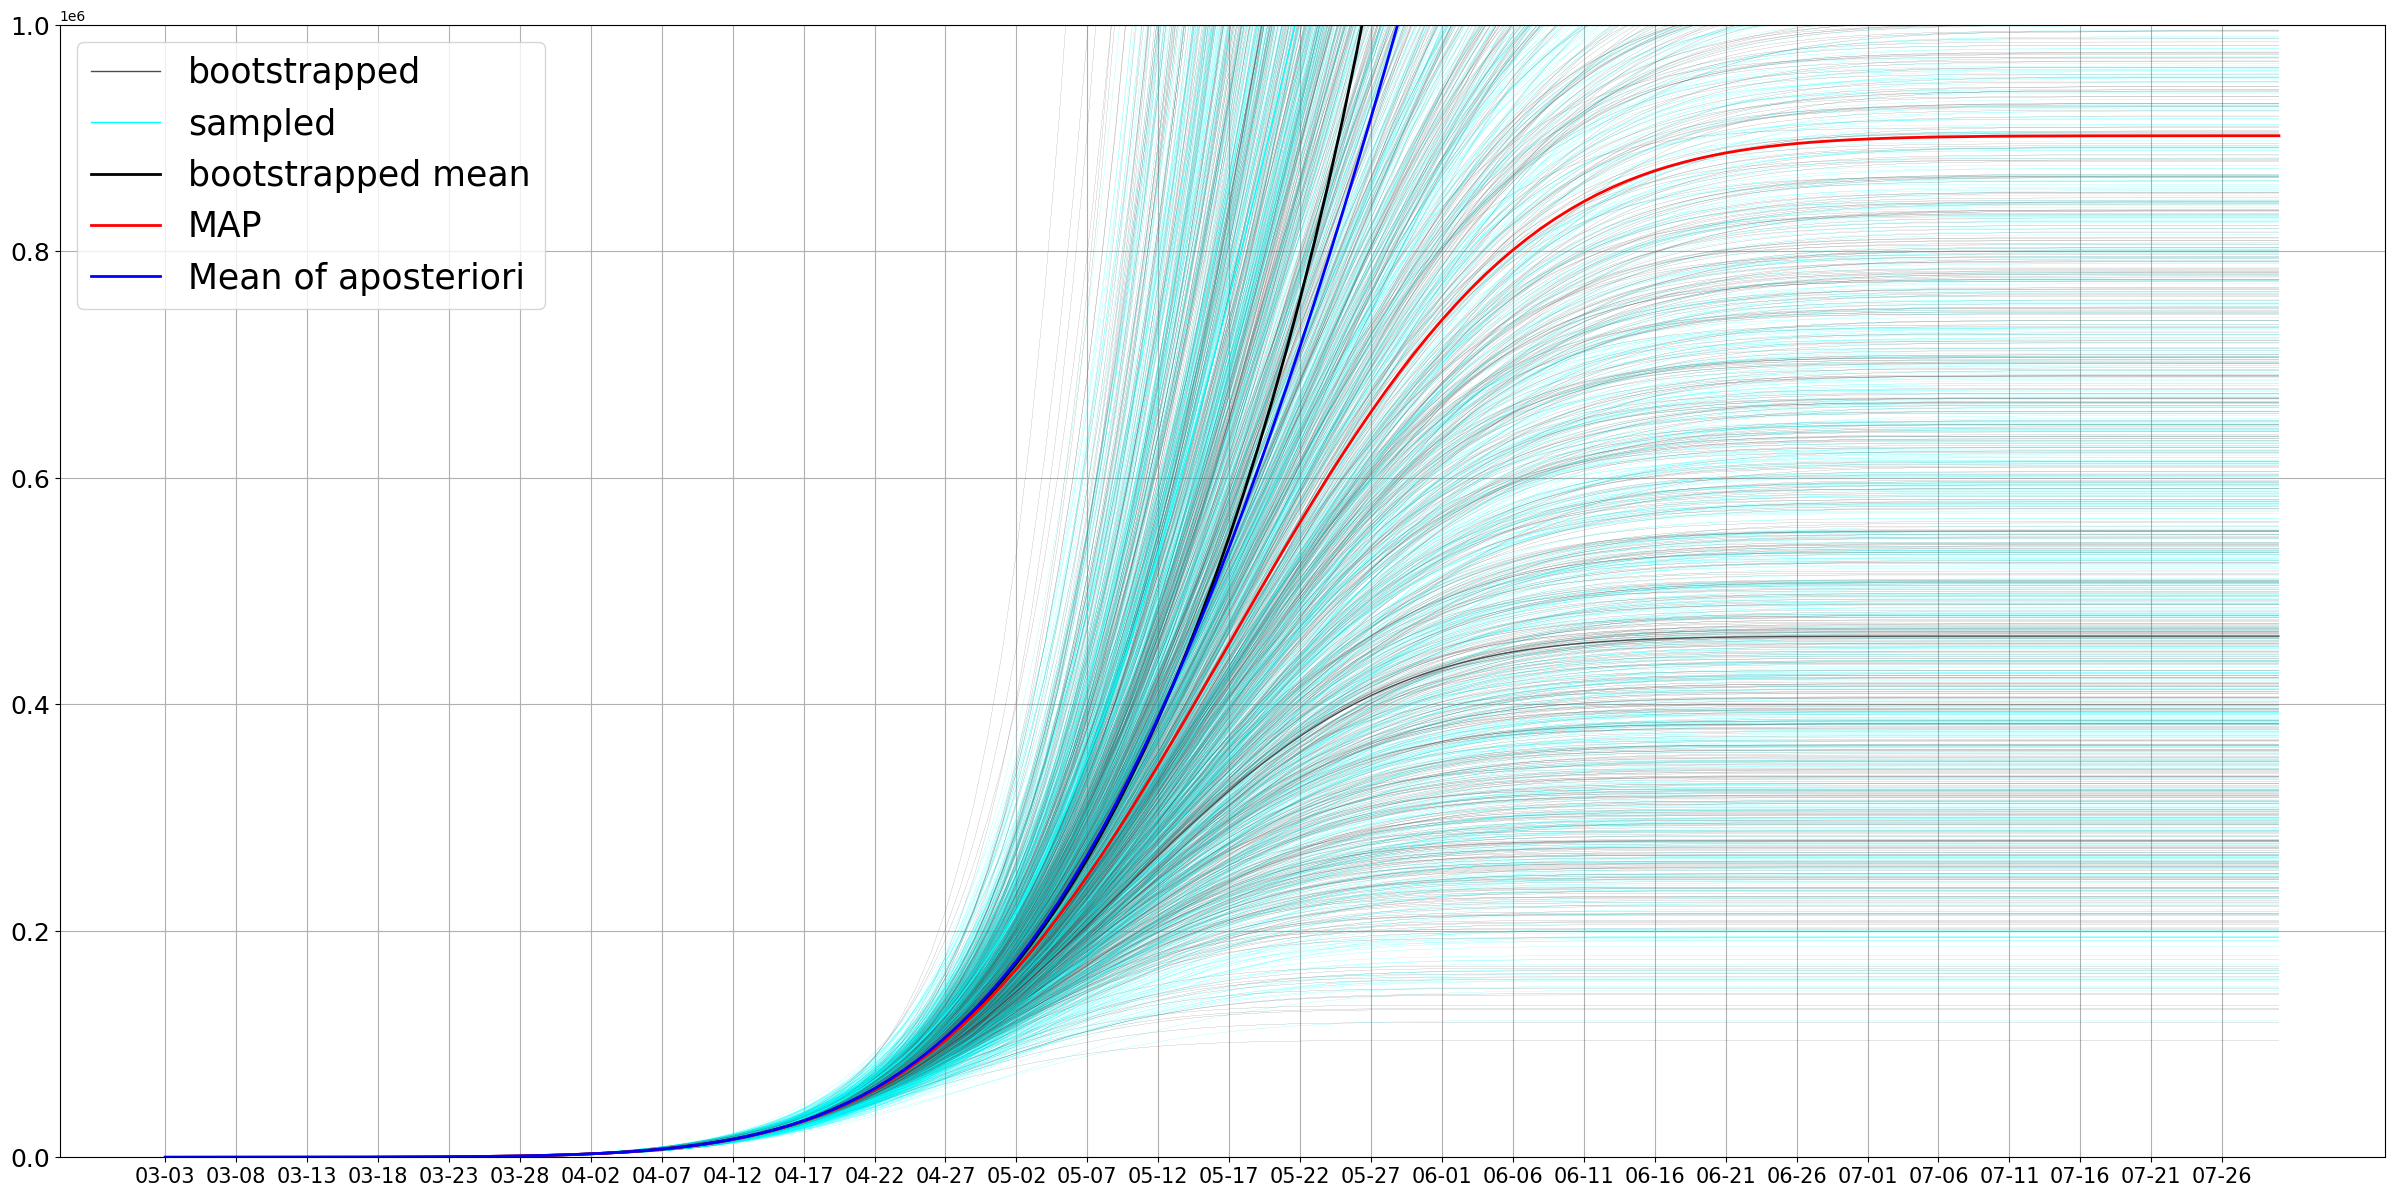

In [23]:
N = 1000
sample_size = 30
plt.figure(figsize=(30, 15), dpi=100)
days_large = 150
date_formatted_large = data[(data['location'] == 'Russia') &
                            (data['date'] >= '2020-03-03')].iloc[:days_large]['date'].map(lambda x: x[5:])
X_large = np.vstack((np.arange(days_large)**2, np.arange(days_large))).T
res_sig = []
res_sig2 = []
sampled_params2 = np.random.multivariate_normal(mu_map2, cov_matrix2, size=N)
linregs2 = []
for i in range(N):
    cur_data_idxs = np.random.choice(np.arange(50), sample_size, replace=True)
    linregs2.append(Ridge(alpha=result2.x[0]/alpha2).fit(X_train2[cur_data_idxs], log_y2.iloc[cur_data_idxs]))
    
    res_sig.append(np.exp(linregs2[-1].predict(X_large)))
    
    w = sampled_params2[i]
    res_sig2.append(np.exp(transform_X(X_large) @ w))

    if i == N-1:
        plt.plot(date_formatted_large, np.cumsum(res_sig[-1]), linewidth=1, color='0.3', label='bootstrapped')
        plt.plot(date_formatted_large, np.cumsum(res_sig2[-1]), linewidth=1, color='cyan', label='sampled')
    else:
        plt.plot(date_formatted_large, np.cumsum(res_sig[-1]), linewidth=.1, color='0.3')
        plt.plot(date_formatted_large, np.cumsum(res_sig2[-1]), linewidth=.1, color='cyan')

plt.plot(date_formatted_large, np.cumsum(np.mean(np.array(res_sig), axis=0)), linewidth=2, color='black', label='bootstrapped mean')
plt.plot(date_formatted_large, np.cumsum(np.exp(transform_X(X_large) @ mu_map2)), linewidth=2, color='red', label='MAP')
plt.plot(date_formatted_large, np.cumsum(np.mean(np.array(res_sig2), axis=0)), linewidth=2, color='blue', label='Mean of aposteriori')


left, right = plt.xlim()
plt.ylim(0, 1e6)
# plt.xlim(left+40, right)

plt.xticks(date_formatted_large.iloc[::5], fontsize=15)
# plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.legend(fontsize=25)
plt.grid()
plt.show()

Как мы видим в этом случае дисперсии предсказаний бутстрапированных регрессий практически совпадают с дисперсией предсказаний засэмпленный регрессий. Кроме того среднее предсказание засэмпленных регрессий теперь совпадает с средним бутстрапированных регрессий и сильно больше предсказания регрессии с весами равными $w_{MAP}$. Как мы видим из MAP оценки, всего случаев в России будет около 900 тысяч.

In [24]:
days_till_may = np.vstack((np.arange(may_1st_day)**2, np.arange(may_1st_day))).T
days_till_june = np.vstack((np.arange(june_1st_day)**2, np.arange(june_1st_day))).T
days_till_september = np.vstack((np.arange(september_1st_day)**2, np.arange(september_1st_day))).T

may_predictions_sig = [np.sum(np.exp(model.predict(days_till_may))) for model in linregs2]
june_predictions_sig = [np.sum(np.exp(model.predict(days_till_june))) for model in linregs2]
september_predictions_sig = [np.sum(np.exp(model.predict(days_till_september))) for model in linregs2]


may_predictions_sig_sampled = [np.sum(np.exp(transform_X(days_till_may) @ w)) for w in sampled_params2]
june_predictions_sig_sampled = [np.sum(np.exp(transform_X(days_till_june) @ w)) for w in sampled_params2]
september_predictions_sig_sampled = [np.sum(np.exp(transform_X(days_till_september) @ w)) for w in sampled_params2]

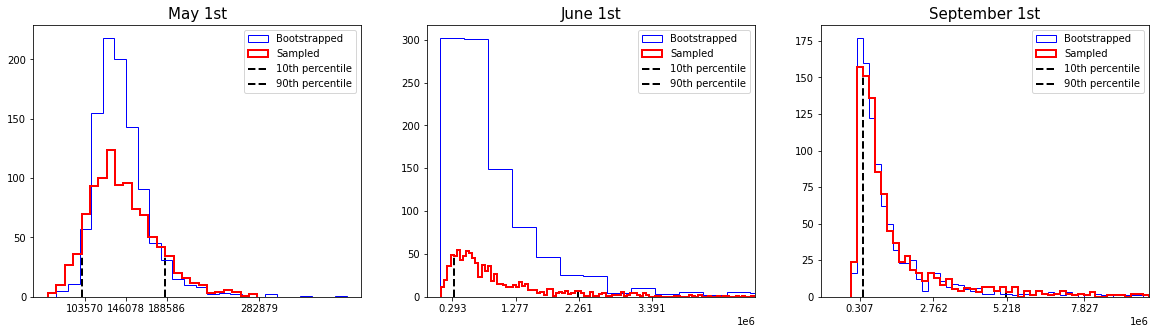

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i, ((preds_bootstrapped, preds_sampled), title, ax) in enumerate(zip(list(zip([may_predictions_sig, june_predictions_sig, september_predictions_sig],
                        [may_predictions_sig_sampled, june_predictions_sig_sampled, september_predictions_sig_sampled])),
                            ['May 1st', 'June 1st', 'September 1st'],
                            axes)):
    ax.set_title(title, fontsize=15)
    
    per_10, per_50, per_90 = np.percentile(preds_sampled, [10, 50, 90])
   
    if i == 0:
        bins=25
        range=None
    elif i == 1:
        bins=250
        range=None
    elif i == 2:
        bins=50
        range=(0, 1e7)
        
    ax.hist(preds_bootstrapped, bins=bins, histtype='step',
                      range=range, color='blue', linewidth=1, label='Bootstrapped')

    if i == 0:
        bins=25
        range=None
    elif i == 1:
        bins=250
        range=None
    elif i == 2:
        bins=50
        range=(0, 1e7)
    n, bins, _ = ax.hist(preds_sampled, bins=bins, histtype='step',
            range=range, color='red',  linewidth=2, label='Sampled')
    
    idx_per_10 = (np.abs(bins - per_10)).argmin()
    ax.vlines(bins[idx_per_10], 0, n[idx_per_10], color='black', linewidth=2,
              linestyle='dashed', label='10th percentile')
    idx_per_90 = (np.abs(bins - per_90)).argmin()
    ax.vlines(bins[idx_per_90], 0, n[idx_per_90], color='black', linewidth=2,
              linestyle='dashed', label='90th percentile')

    ax.set_xticks([per_10, (per_10 + per_90) // 2, per_90, per_90 + (per_90) // 2])

    ax.legend()
    
axes[1].set_xlim(-1e5, 5e6)   
axes[2].set_xlim(-1e6, 1e7)   
plt.show()

Стоит отметить, что у предсказательного распределения на 1 сентрября очень тяжелый правый хвост. Настолько тяжелый, что мат ожидание уходит далеко за 90-й перцентиль, который равен 6 миллионам человек. Чтобы не перегружать графики я не стал рисовать на них мат. ожидание.

Из упражнения главным образом я понял как применять баесовский вывод для оценки параметров регрессии.
Самый сложный момент в пандемии это период ее экспоненциального роста. Система здравоохранения может не выдержать такой огромной нагрузки, и лучше ввести карантин именно в это время, чтобы замедлить темпы роста в этот период. Судя по предсказания, период наискорейшего роста ожидается с апреля по июль